KHAI PHÁ DỮ LIỆU

IMPORT CÁC THƯ VIỆN CẦN THIẾT

In [48]:
import pandas as pd
import regex as re
import seaborn as sns
import numpy as np
from wordcloud import WordCloud
import matplotlib.pyplot as plt

ĐỌC DỮ LIỆU

In [49]:
df = pd.read_csv('data/clean_review.csv', encoding= 'utf-8')
df.head()

,id,title,content,thank_count,customer_id,rating,product_id,clean_content
0,19906519,Cực kì hài lòng,Sau khi phản ánh việc tác giả đặt tên sách trù...,8,13450478,5,275025208,phản_ánh tác_giả sách_trùng sách nước_ngoài nh...
1,19968834,Hài lòng,Tạm thời thấy ổn.Đọc xong sẽ review sau.hj.Yh...,0,19821878,4,275025208,tạm_thời ổn đọc review hj yhanks
2,19943636,Rất không hài lòng,quyển sách với tựa đề làm hiểu lầm cái khách h...,0,14317039,1,275025208,quyển sách tựa_đề lầm khách_hàng viết không đủ...
3,19919040,Cực kì hài lòng,"Giao hàng nhanh, đóng gói cẩn thận",0,13713637,5,275025208,giao hàng đóng_gói cẩn_thận
4,19963835,Hài lòng,"Tạm được, phù hợp những bạn chưa đọc nhiều sác...",0,7159313,4,275025208,tạm đọc sách tác_giả nội_sưu_tầm trùng_lặp


In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15403 entries, 0 to 15402
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   id             15403 non-null  int64 
 1   title          15403 non-null  object
 2   content        15403 non-null  object
 3   thank_count    15403 non-null  int64 
 4   customer_id    15403 non-null  int64 
 5   rating         15403 non-null  int64 
 6   product_id     15403 non-null  int64 
 7   clean_content  15402 non-null  object
dtypes: int64(5), object(3)
memory usage: 962.8+ KB


In [51]:
df.dropna(subset= ['clean_content'], inplace=True)
df.drop_duplicates(subset= ['clean_content'], inplace=True)
df.shape

(15402, 8)

In [52]:
df[['rating', 'thank_count']].describe()

,rating,thank_count
count,15402.000000,15402.000000
mean,4.474484,1.380989
std,1.096904,7.718660
min,1.000000,0.000000
25%,5.000000,0.000000
50%,5.000000,0.000000
75%,5.000000,1.000000
max,5.000000,551.000000


Dữ liệu trong cột ‘rating' và ‘thanh_count’ cho thấy với 15402 đánh giá. Lượt đánh giá 5 sao là cao nhất, 1 sao là thấp nhất và số sao trung bình cho mỗi đánh giá là xấp xỉ 4.47 sao, tương đối cao. Lượng thank_count trung bình là 1,3 cảm ơn trên một đánh giá, cho thấy người dùng có xu hướng đọc cái đánh giá của khách hàng mua trước để có thêm thông tin để quyết định có mua hàng hay không.

In [54]:
df_group = df[['id', 'rating', 'thank_count']].groupby('rating').agg({'thank_count': ['sum', 'mean'], 'id': 'count'})
print(df_group)

       thank_count               id
               sum      mean  count
rating                             
1             1354  1.585480    854
2              545  1.164530    468
3              646  0.790698    817
4              870  0.530488   1640
5            17855  1.536178  11623


Các đánh giá được cảm ơn nhiều là các đánh giá 1 sao và 5 sao, điều này cho thấy người dùng có xu hướng tránh các review mang tính trung lập không mang tính quyết định cao lựa chọn những review có xu hướng chi tiết hơn và có giá trị hơn.

In [55]:
df['word_count'] = df['clean_content'].apply(lambda x: len(re.split('_| ', x)) if isinstance(x, str) else 0)

In [56]:
df.head()

,id,title,content,thank_count,customer_id,rating,product_id,clean_content,word_count
0,19906519,Cực kì hài lòng,Sau khi phản ánh việc tác giả đặt tên sách trù...,8,13450478,5,275025208,phản_ánh tác_giả sách_trùng sách nước_ngoài nh...,37
1,19968834,Hài lòng,Tạm thời thấy ổn.Đọc xong sẽ review sau.hj.Yh...,0,19821878,4,275025208,tạm_thời ổn đọc review hj yhanks,7
2,19943636,Rất không hài lòng,quyển sách với tựa đề làm hiểu lầm cái khách h...,0,14317039,1,275025208,quyển sách tựa_đề lầm khách_hàng viết không đủ...,23
3,19919040,Cực kì hài lòng,"Giao hàng nhanh, đóng gói cẩn thận",0,13713637,5,275025208,giao hàng đóng_gói cẩn_thận,6
4,19963835,Hài lòng,"Tạm được, phù hợp những bạn chưa đọc nhiều sác...",0,7159313,4,275025208,tạm đọc sách tác_giả nội_sưu_tầm trùng_lặp,10


In [72]:
corr_matrix = df[['rating', 'word_count', 'thank_count']].corr()
print(corr_matrix)

               rating  word_count  thank_count
rating       1.000000   -0.022693     0.015068
word_count  -0.022693    1.000000     0.205389
thank_count  0.015068    0.205389     1.000000


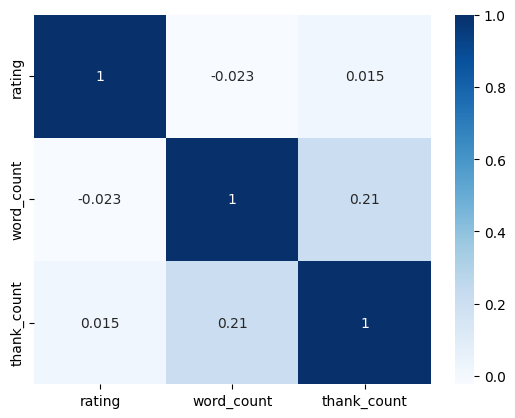

In [71]:
corr_matrix = df[['rating', 'word_count', 'thank_count']].corr()
sns.heatmap(corr_matrix, annot = True, cmap = 'Blues')
plt.show()

In [59]:
df_group = df[['id', 'rating', 'thank_count', 'word_count']].groupby('rating')\
.agg({'thank_count': ['sum', 'mean'], 'id': 'count', 'word_count': 'mean'})
print(df_group)

       thank_count               id word_count
               sum      mean  count       mean
rating                                        
1             1354  1.585480    854  23.487119
2              545  1.164530    468  23.341880
3              646  0.790698    817  23.332925
4              870  0.530488   1640  23.161585
5            17855  1.536178  11623  21.630474


<Axes: xlabel='thank_count', ylabel='word_count'>

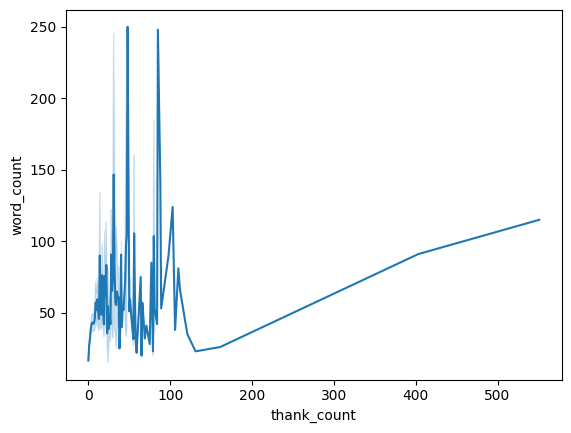

In [60]:
sns.lineplot(x='thank_count', y='word_count', data=df)

Từ bảng đo độ tương quan, rating và word_count không có sự tương quan nào rõ rệt, số lượng từ trung bình ở mỗi rating không có sự chênh lệch nhiều. Tuy nhiên số lượng từ trung bình ở rating 5 sao thấp hơn nhiêu so với các rating khác dù có lượng đánh giá nhiều hơn, có thể nhiều bình luận 5 sao khách hàng đã hài lòng về sản phẩm với kỳ vọng nên không có nhiều vấn đề để nói đến.

Có độ tương quan thuận giữa word_count và thank_count, điều này cho thấy bình luận nhiều chữ nhận được nhiều lượt cảm ơn hơn, có lẽ do bình luận dài thường chứa nhiều thông tin mang tinh quyết định, dễ đánh giá sản phẩm hơn.

GÁN NHÃN DỮ LIỆU

Mình qui định là những đánh giá từ 4 sao trở lên là tích cực(1) và ngược lại từ 3 sao trở xuống là tiêu cực (0).

In [62]:
df_final = df[['id', 'rating', 'clean_content']]

In [63]:
df_final['class'] = df_final.apply(lambda x: 'negative' if x['rating'] < 4 else 'positive', axis=1) 
df_final = df_final[['id', 'clean_content','class']]
df_final.reset_index(drop=True, inplace=True)
df_final.head()

C:\Users\Asus\AppData\Local\Temp\ipykernel_1768\1333364846.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final['class'] = df_final.apply(lambda x: 'negative' if x['rating'] < 4 else 'positive', axis=1)


,id,clean_content,class
0,19906519,phản_ánh tác_giả sách_trùng sách nước_ngoài nh...,positive
1,19968834,tạm_thời ổn đọc review hj yhanks,positive
2,19943636,quyển sách tựa_đề lầm khách_hàng viết không đủ...,negative
3,19919040,giao hàng đóng_gói cẩn_thận,positive
4,19963835,tạm đọc sách tác_giả nội_sưu_tầm trùng_lặp,positive


Loại bỏ những đánh giá dưới 2 từ

In [64]:
df_final['word_count'] = df_final['clean_content'].apply(lambda x: len(str(x).split(' ')))
df_final = df_final[df_final['word_count'] > 2]
df_final['class'].value_counts()

class
positive    12718
negative     2105
Name: count, dtype: int64

Lưu vào file excel

In [65]:
df_final.dropna(subset='clean_content', inplace=True)
df_final.drop_duplicates(subset= ['clean_content'], inplace=True)
df_final.reset_index(drop=True, inplace=True)
df_final.shape

(14823, 4)

In [66]:
df_final = df_final[['id', 'clean_content', 'class']]
df_final.to_csv('data/final_review.csv', index=False, encoding='utf8')

WORD ANALYSIS

NEGATIVE

In [67]:
df_final_notlike = df_final[df_final['class'] == 'negative' ]
wc_notlike = WordCloud(
    background_color='black',
    max_words=500
)
wc_notlike.generate(str(df_final_notlike['clean_content'].values))

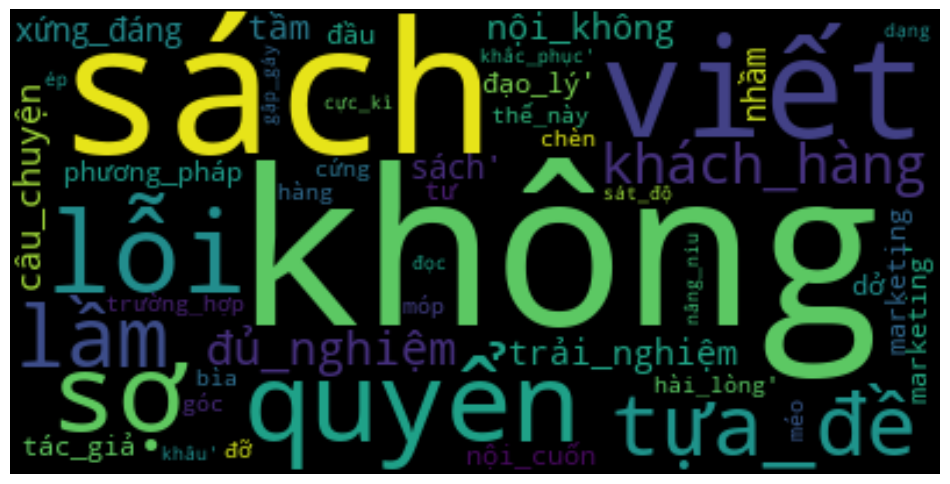

In [68]:
plt.figure(figsize=(12, 12))
plt.imshow(wc_notlike, interpolation='bilinear')
plt.axis('off')
plt.show()

POSITIVE

In [69]:
df_final_like = df_final[df_final['class'] == 'positive' ]
wc_like = WordCloud(
    background_color='black',
    max_words=500
)
wc_like.generate(str(df_final_like['clean_content'].values))

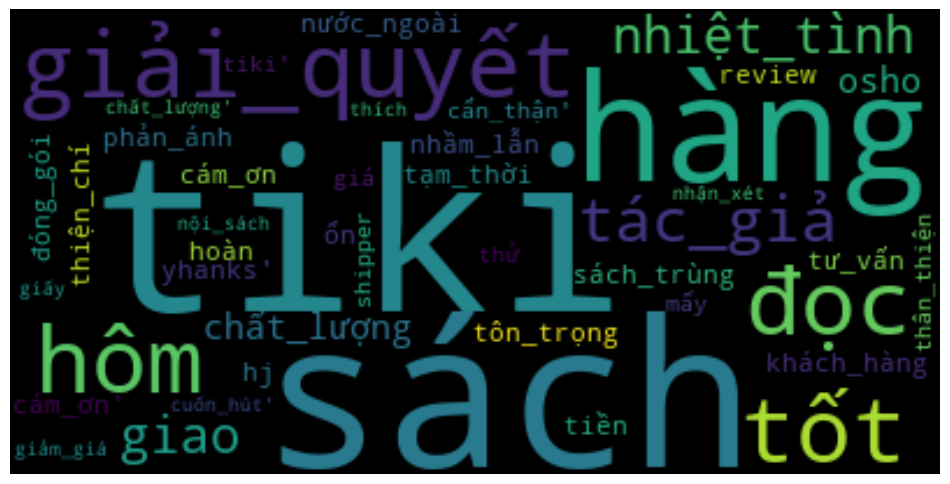

In [70]:
plt.figure(figsize=(12, 12))
plt.imshow(wc_like, interpolation='bilinear')
plt.axis('off')
plt.show()

Sau khi thực hiện tiền xử lý dữ liệu, bộ dữ liệu còn nhiều nội dung chưa chuẩn với nhãn dán của đánh giá, mình tiến hành xử lý bằng cách gán nhãn bằng tay cho hơn 14000 câu.